# Pima Indians diabetes mellitus classification based on machine learning (ML) algorithms
#### Projekt iz predmeta Uvod u znanost o podacima
---
Autor: Martin Bakač

## 1. Priprema i vizualizacija podataka 
---
Ciljevi:
- učitati podatke i pogledati koliko podataka uopće ima ✔️
- kakvi su tipovi podataka ✔️
- pozabaviti se sa nedostajućim i stršećim vrijednostima ✔️
- normalizirati vrijednosti ✔️
- malo ih vizualizirati ✔️

### 1.1 Učitavanje podataka i tablični prikaz
----
Podaci su učitani iz .csv tablice. Sastoje se od 768 primjeraka s po 9 značajki opisanih niže.

In [532]:
# import libraries

import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

In [533]:
# load and show data

FILE_PATH = './data/diabetes.csv'
data = pd.read_csv(FILE_PATH)

data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### 1.2 Opis i tipovi podataka
----
Sadržaj tablice su popis značajki i opis istih preuzet s stanice skupa podataka te tip podatka dobiven s [`DataFrame.dtypes`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dtypes.html#pandas-dataframe-dtypes). 

| Feature                   | Description                                                | Data Type  |
|:--------------------------|:-----------------------------------------------------------|:-----------|
| Pregnancies               | Number of times pregnant                                   | int64      |
    | Glucose                   | Plasma glucose concentration a 2 hours in an oral glucose tolerance test | int64 |
| BloodPressure             | Diastolic blood pressure (mm Hg)                          | int64      |
| SkinThickness             | Triceps skin fold thickness (mm)                           | int64      |
| Insulin                   | 2-Hour serum insulin (mu U/ml)                            | int64      |
| BMI                       | Body mass index (weight in kg/(height in m)^2)            | float64    |
| DiabetesPedigreeFunction  | Diabetes pedigree function                                | float64    |
| Age                       | Age (years)                                                | int64      |
| Outcome                   | Class variable (0 or 1) 268 of 768 are 1, the others are 0 | int64 (effectively boolean)     |


### 1.3 Nedostajuće i stršeće vrijednosti
----
#### 1.3.1 Deskriptivna statistika
----
Lako provedena s [`DataFrame.describe()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html).

In [534]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### 1.3.2 Nedostajuće vrijednosti
----
Pandas podržava rad s nedostajućim vrijednostim a pa možemo generirati masku istih s [`DataFrame.isna()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isna.html#pandas.DataFrame.isna). Zatim s [`DataFrame.value_counts()`](https://pandas.pydata.org/docs/user_guide/basics.html#value-counts-histogramming-mode)  dobimo broj pojavljanja svake različite vrijednosti maske.
\
\
Vidimo da nedostajućih vrijednosti kako ih pandas definira nema.

In [535]:
missing_mask = data.isna()
missing_mask.value_counts()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI    DiabetesPedigreeFunction  Age    Outcome
False        False    False          False          False    False  False                     False  False      768
Name: count, dtype: int64

#### 1.3.2 Stršeće vrijednosti
----
Crtanjem [boxploteva](https://en.wikipedia.org/wiki/Box_plot) možemo vidjeti stršeće vrijednosti. Isključena je značajka *Outcome* jer je nominalna.
\
Gledajući raspon podataka, neke stvari su sumnjivie, primjerice krvni tlak kod živih ljudi nebi smio biti 0, kao niti BMI, koncentracija glukoze u krvi niti debljina kože. Isti problem se navodi i u referentnom članku. U članku tvrde da isto vrijedi i za koncentraciju inzulina u krvi, no, jer nisam stručnjak niti sam uspio pronaći izvor koji to potvrđuje ili opovrgava pretpostavit ću su vrijednosti te značajke u normalnom rasponu. 

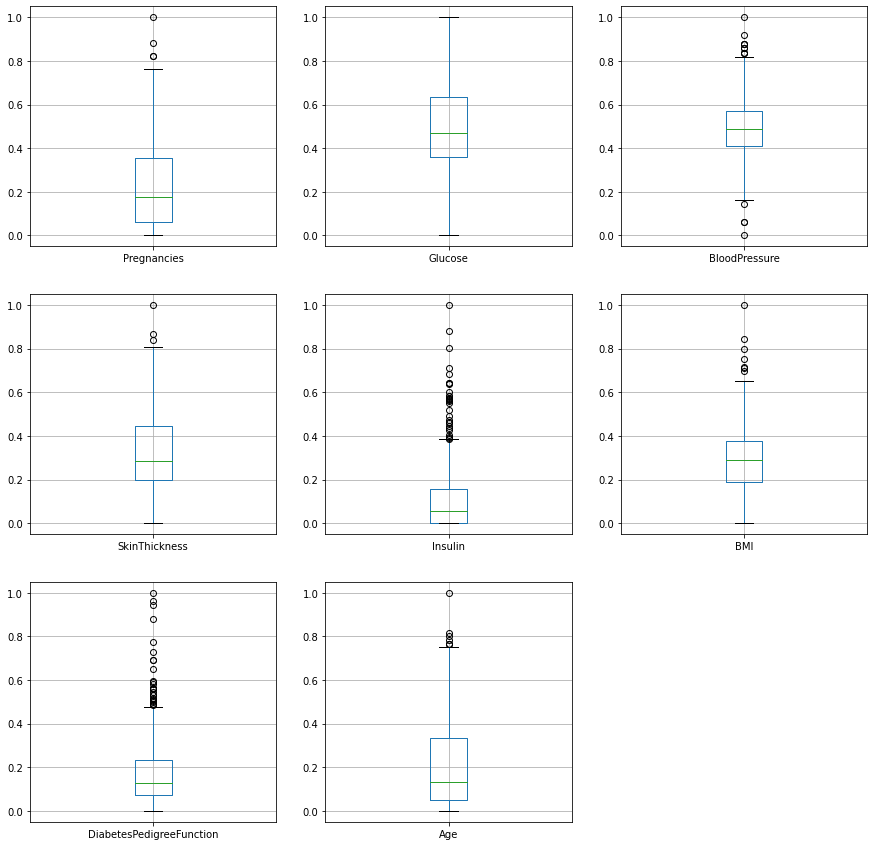

In [546]:
# after looking at pd.DataFrame.boxplot this might be unnecessary
def boxPlot(data: pd.DataFrame):
    plt.figure(figsize=(15,15))
    for i, column in enumerate(data.loc[:, data.columns != 'Outcome']):
        plt.subplot(3,3,i+1)
        data.boxplot([column])
            
boxPlot(data)

Promatrajući grafove, vidljivi su gore navedeni nedostaci kao stršeće vrijednosti, a kod debljine kože izgleda da je cijeli skup dosta iskrivljen - cijeli prvi kvartal dakle 25% ili više ima vrijednost 0 koja je nemoguća.

In [537]:
print(f"Broj uzoraka gdje je 'SkinThickness'==0: {data['SkinThickness'].value_counts()[0]}")

Broj uzoraka gdje je 'SkinThickness'==0: 227


In [538]:
# see what removing impossible values does to the number of samples
testData = data.copy(deep=True)

# returns input dataframe with removed zero values for given property
def removeZeroValues(data: pd.DataFrame, property: str, printNumberOfRemoved: bool = False) -> pd.DataFrame:
    newData = data[data[property] != 0]
    if printNumberOfRemoved: print(f"deleted {data.shape[0] - newData.shape[0]:3} samples, property: {property}")
    return newData

testData = removeZeroValues(testData, 'SkinThickness', printNumberOfRemoved=True)
testData = removeZeroValues(testData, 'BloodPressure', printNumberOfRemoved=True)
testData = removeZeroValues(testData, 'BMI', printNumberOfRemoved=True)
testData = removeZeroValues(testData, 'Glucose', printNumberOfRemoved=True)

testData.shape

deleted 227 samples, property: SkinThickness
deleted   2 samples, property: BloodPressure
deleted   2 samples, property: BMI
deleted   5 samples, property: Glucose


(532, 9)

Ukoliko bismo micali iz skupa sve retke s "nemogućim" vrijednostima broj uzoraka bi nam pao na 532 (-30.7%). Najveći "krivac" za ovje je "SkinThickness" pa, kako bi očuvali velik broj uzoraka za tu značajku, ću vrijednosti 0 promijeniti na srednju vrijednost ostalih uz šum kako bih očuvao srednju vrijednost i varijancu.\
Za ostale značajke sam uklonio nemoguće vrijednosti jer ih je svega 9.

In [539]:
data = removeZeroValues(data, 'BloodPressure')
data = removeZeroValues(data, 'BMI')
data = removeZeroValues(data, 'Glucose')

# changes zero values of given DataFrame to the mean of the rest
def changeZeroValuesToMean(data: pd.DataFrame, property: str) -> pd.DataFrame:
    meanData = data.copy(deep=True)
    meanData = removeZeroValues(meanData, property)
    mean, std = meanData[property].mean(), np.sqrt(meanData[property].var())
    
    data.loc[data[property] == 0, property] = mean + np.random.normal(mean, std, data[property].eq(0).sum())
    
    return data

data = changeZeroValuesToMean(data, 'SkinThickness')

In [540]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000
mean,3.866022,121.882597,72.400552,37.019873,84.494475,32.467127,0.474765,33.350829,0.343923
std,3.362803,30.750030,12.379870,16.610092,117.016513,6.888941,0.332315,11.765393,0.475344
min,0.000000,44.000000,24.000000,7.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,0.000000,27.500000,0.245000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,33.000000,48.000000,32.400000,0.379000,29.000000,0.000000
75%,6.000000,142.000000,80.000000,48.000000,130.500000,36.600000,0.627500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


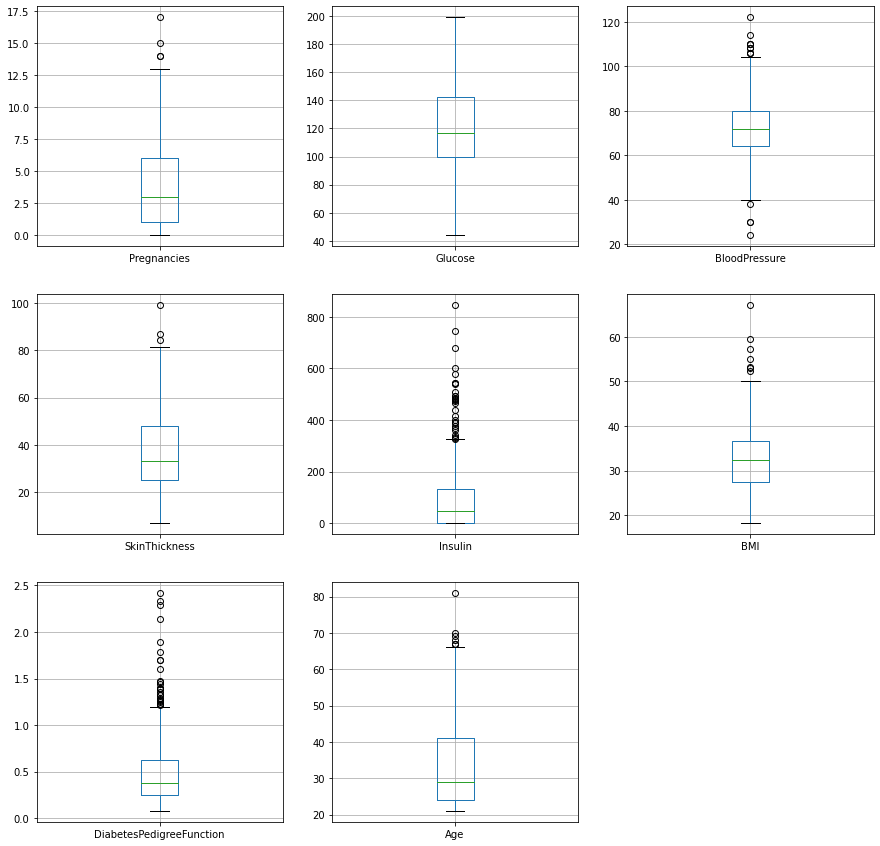

In [541]:
boxPlot(data)

Skup podataka nam se sad satoji od 724 primjera, a vrijenosti značajke "SkinThickness" gdje je bila 0 su postavljene na srednju vrijednost. Nisam siguran jeli ovo korektan pristu pa molim asistenta da komentira.
\
Iako daljnje stršeće vrijednosti postoje, odlučio sam ih ne uklanjati jer bi dovoljno dobar model trebao biti rebustan na njih. Kasnije ih možemo maknuti i vidjeti poboljšava li to performanse modela.

### 1.4 Normalizacija
----
Provedena je [MinMax](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) normalizacija pomoću biblioteke [scikit-learn](https://scikit-learn.org/stable/index.html).

In [542]:
scaled = MinMaxScaler().fit_transform(data)
scaled_data = pd.DataFrame(scaled, columns=data.columns)

data = scaled_data
scaled_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.670968,0.489796,0.304348,0.000000,0.314928,0.234415,0.483333,1.0
1,0.058824,0.264516,0.428571,0.239130,0.000000,0.171779,0.116567,0.166667,0.0
2,0.470588,0.896774,0.408163,0.726605,0.000000,0.104294,0.253629,0.183333,1.0
3,0.058824,0.290323,0.428571,0.173913,0.111111,0.202454,0.038002,0.000000,0.0
4,0.000000,0.600000,0.163265,0.304348,0.198582,0.509202,0.943638,0.200000,1.0
...,...,...,...,...,...,...,...,...,...
719,0.588235,0.367742,0.530612,0.445652,0.212766,0.300613,0.039710,0.700000,0.0
720,0.117647,0.503226,0.469388,0.217391,0.000000,0.380368,0.111870,0.100000,0.0
721,0.294118,0.496774,0.489796,0.173913,0.132388,0.163599,0.071307,0.150000,0.0
722,0.058824,0.529032,0.367347,0.467657,0.000000,0.243354,0.115713,0.433333,1.0


### 1.5 Vizulaizacija
----
Ponovo je nacrtan box plot, sada s normaliziranim vrijednostima. Te boxploteve po ishodu - "Outcome" polju.

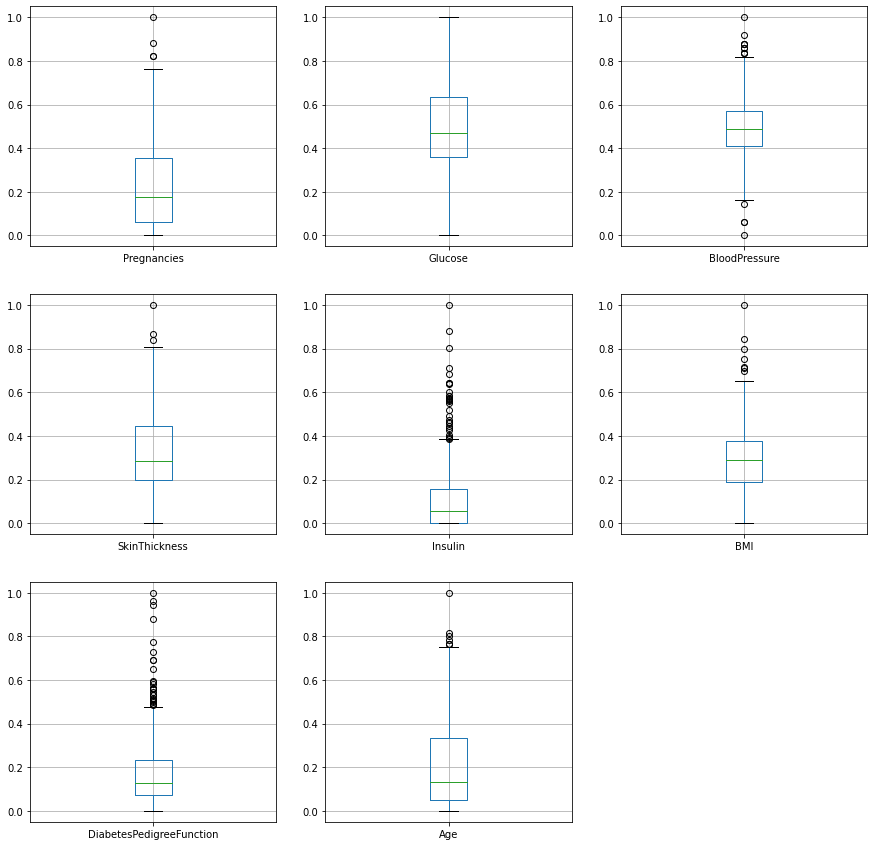

In [543]:
boxPlot(data)

array([[<AxesSubplot:title={'center':'Age'}, xlabel='[Outcome]'>,
        <AxesSubplot:title={'center':'BMI'}, xlabel='[Outcome]'>,
        <AxesSubplot:title={'center':'BloodPressure'}, xlabel='[Outcome]'>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}, xlabel='[Outcome]'>,
        <AxesSubplot:title={'center':'Glucose'}, xlabel='[Outcome]'>,
        <AxesSubplot:title={'center':'Insulin'}, xlabel='[Outcome]'>],
       [<AxesSubplot:title={'center':'Pregnancies'}, xlabel='[Outcome]'>,
        <AxesSubplot:title={'center':'SkinThickness'}, xlabel='[Outcome]'>,
        <AxesSubplot:>]], dtype=object)

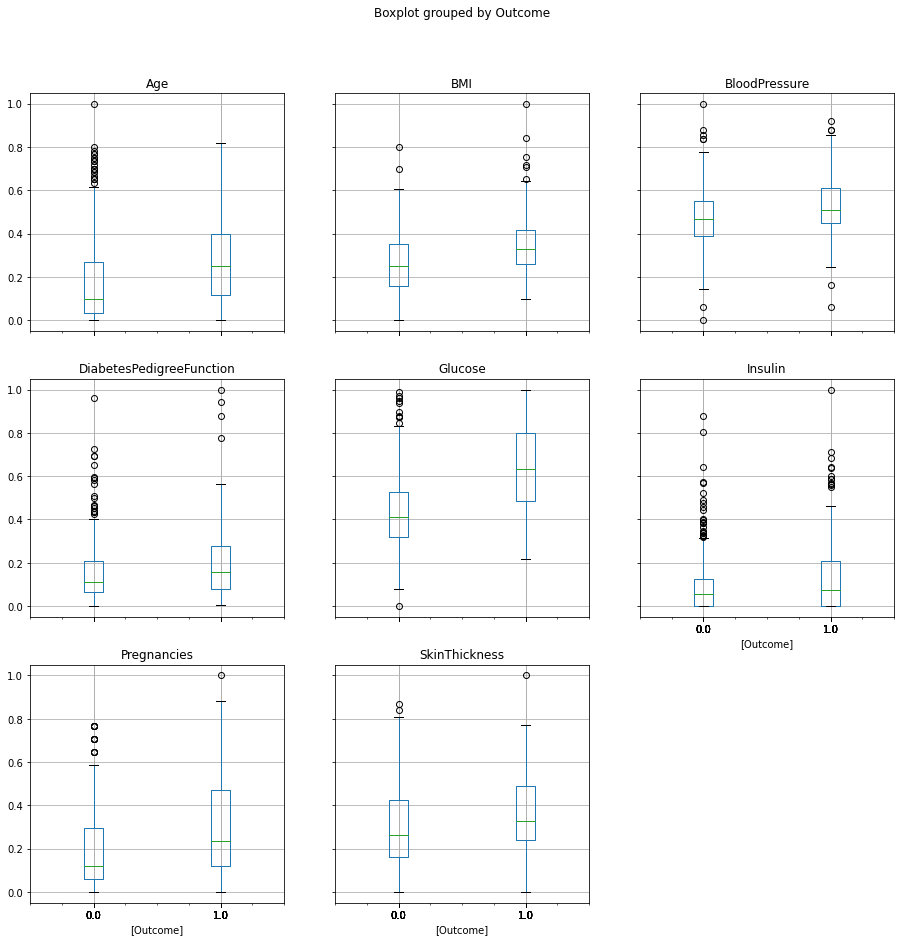

In [547]:
data.boxplot(figsize=(15,15), by='Outcome')

Usporedbom boxploteva podjeljenih po ishodu može dobiti intuiciju o tome je li i kao je koja druga značajka korelirana.
\
Dolje je prikazan histogram značajke 'Insulin' jer naizgled ima najviše stršećih vrijednosti pa možemo vidjeti otprilike u kojem se udjelu pojavljuju.

<AxesSubplot:>

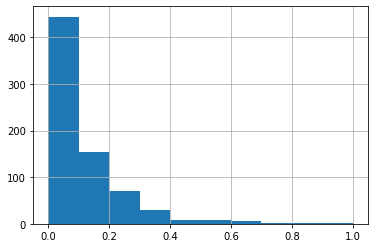

In [548]:
data['Insulin'].hist()

Zanimao me odnos distribucija trudnoća između skupina s različitim ishodima.

<AxesSubplot:>

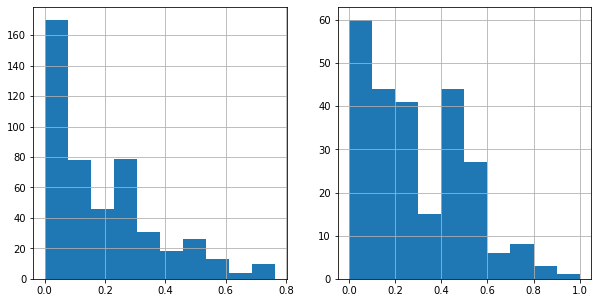

In [551]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
data.loc[data['Outcome'] == 0, 'Pregnancies'].hist()
plt.subplot(1,2,2)
data.loc[data['Outcome'] == 1, 'Pregnancies'].hist()